<div class="alert alert-block alert-info" align="center">

# Logistic Regression    
    
</div>

***

<div class="alert alert-block alert-info" align="center">

# Logistic Regression Formula
    
</div>

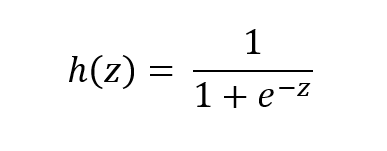

<div class="alert alert-block alert-success">

## Importing Required Pakages
    
</div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

***

<div class="alert alert-block alert-info">

### Creating a Dataframe using the REGRESSION.csv
    
</div>

In [2]:
df = pd.read_csv("Classification_temp.csv")
df
#df.head()

,Age,Can_buy
0,28,0
1,15,0
2,55,1
3,36,0
4,56,1
5,23,0
6,10,0
7,89,1
8,45,0
9,18,1


***

### Plotting the Points on a Scatter Plot

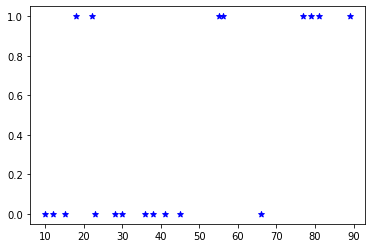

In [3]:
plt.scatter(df.Age,df.Can_buy,marker='*',color='blue')

***

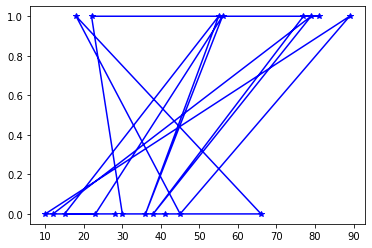

In [4]:
plt.plot(df.Age,df.Can_buy,marker='*',color='blue')

***

### Importing train_test_split

#### Seperating the Training and Testing Dataset into X_train, X_test, y_train, y_test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Age']],df.Can_buy,train_size=0.8)

### Printing X_train & y_train 

In [303]:
for i in X_train:
    print(X_train[i])
    print("")
    print(y_train)


13    22
7     89
10    66
0     28
9     18
16    38
4     56
15    77
17    79
8     45
11    41
6     10
12    30
3     36
1     15
Name: Age, dtype: int64

13    1
7     1
10    0
0     0
9     1
16    0
4     1
15    1
17    1
8     0
11    0
6     0
12    0
3     0
1     0
Name: Can_buy, dtype: int64


### Printing X_test & y_test

In [243]:
X_test

,Age
2,55
5,23
14,81
18,12


In [242]:
y_test

2     1
5     0
14    1
18    0
Name: Can_buy, dtype: int64

***

<div class="alert alert-block alert-success">

### Importing Logistic Regression

## &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; & 

### Assigning Logistic Regression to a variable - 'model'
    
</div>

In [280]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Fitting the X_train & y_train into 'model' i.e., Logistic Regression

In [282]:
model.fit(X_train, y_train)

LogisticRegression()

***

In [283]:
X_test

,Age
2,55
5,23
14,81
18,12


In [284]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 1, 0], dtype=int64)

### Performing a Probabiliy Score and checking which age has what Probability

In [289]:
print(X_test)
print(" Not Buying | May Buy")
h = model.predict_proba(X_test)
print(h)

    Age
2    55
5    23
14   81
18   12
 Not Buying | May Buy
[[0.49072698 0.50927302]
 [0.79546554 0.20453446]
 [0.23671631 0.76328369]
 [0.86269081 0.13730919]]


***

<div class="alert alert-block alert-warning">

## Higher the Model Score better trained is the Model

### Model Score ranges from 0.0 - 1.0
    
</div>

In [290]:
model.score(X_test,y_test)

1.0

***

<div class="alert alert-block alert-success" align="center">

# Steps to Calculate Logistic Regression Mannually
    
</div>

<div class="alert alert-block alert-info">

#### 1) We have the X, Y coordinates.
#### 2) First calculate the Coefficient & Intercept.
#### 3) Substitute Values of Coefficient(m) & Intercept(c) in <u>y = mx +c.</u>
#### 4) Hence, we get the <u>Improved Y - Coordinate.</u>
#### 5) Then pass the <u>Improved Y - Coordinate</u> into the Sigmoid Function.
    
</div>

***

<div class="alert alert-block alert-warning">

### Calculating the Coefficient (m)

### model.coef_ indicates value of <u>m</u> in y = mx + c equation
    
</div>

In [293]:
model.coef_

array([[0.04360273]])

In [294]:
x = model.coef_

for i in x:
    for j in i:
        x1 = j

x_coefficient = round(x1, 5)

print(x_coefficient)

0.0436


<div class="alert alert-block alert-warning">

### Calculating the Intercept (c)

### model.intercept_ indicates value of <u>c</u> in y = mx + c equation
    
</div>

In [177]:
model.intercept_

array([-2.36105392])

In [295]:
c = model.intercept_

for i in c:
    c1 = i

intercept = round(c1, 5)

print(intercept)

-2.36105


## Defining Sigmoid / Logistic Regression Function and calculating manually

In [99]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

<div class="alert alert-block alert-info">

## Defining the Prediction Function
    
### 1) Calculating the Improved Y - Coordinate
### 2) Passing this Improved Y - Coordinate intor the Sigmoid Function


<div class="alert alert-block alert-info" align="right">
    
#### *Intercept value must be converted to positive, if negative*
    
#### Use abs() function for the same
    
</div>

In [310]:
def prediction_function(age):
    global y
    
    y = (model.coef_ * age) - abs(model.intercept_)
    
    print("Y - Coordinate      : ", *y)
    
    y = sigmoid(y)
    
    print("Logistic Regression : ", y*100)
    
    print("")
    if (y) < 0.5:
        print("Predicted Value = {:.5f} < 0.5, hence set as 0, i.e, \n\n Person with age {} doesn't have capacity to buy a Lamborghini".format(y,age))
    
    else:
        print("Predicted Value = {:.3f} > 0.5, hence set as 1, i.e, \n\n Person with age {} might have capacity to buy a Lamborghini".format(y,age))
        

In [389]:
prediction_function(36)

Y - Coordinate      :  [-0.79135557]
Logistic Regression :  31.18776756699463

Predicted Value = 0.31188 < 0.5, hence set as 0, i.e, 

 Person with age 36 doesn't have capacity to buy a Lamborghini


In [312]:
age = 63                    #so here the threshold is 36
prediction_function(age)

Y - Coordinate      :  [0.38591819]
Logistic Regression :  59.52997007836234

Predicted Value = 0.595 > 0.5, hence set as 1, i.e, 

 Person with age 63 might have capacity to buy a Lamborghini


In [321]:
age = {28, 15, 55, 36, 56, 23, 10, 89, 45, 18, 66, 41, 30, 22, 81, 77, 38, 79, 12}
buy = [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0]

In [322]:
def prediction_function(age):
    global y
    
    y = (model.coef_ * age) - abs(model.intercept_)
    
    print("Y - Coordinate      : ", *y)
    
    y = sigmoid(y)
    
    print("Logistic Regression : ", y*100)
    
    print("")
    if (y) < 0.5:
        print("Predicted Value = {:.5f} < 0.5, hence set as 0, i.e, \n\n Person with age {} doesn't have capacity to buy a Lamborghini".format(y,age))
    
    else:
        print("Predicted Value = {:.3f} > 0.5, hence set as 1, i.e, \n\n Person with age {} might have capacity to buy a Lamborghini".format(y,age))
        

In [323]:
prediction_function(66)

Y - Coordinate      :  [0.51672638]
Logistic Regression :  62.638196682489266

Predicted Value = 0.626 > 0.5, hence set as 1, i.e, 

 Person with age 66 might have capacity to buy a Lamborghini


In [324]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [381]:
print("Size of List : ", len(age))

logistic = []

print(" i  |        Sigmoid       | Given Input")
print("")
for i,k in zip(age, buy):
    d = sigmoid(i)
    print(i," | ", d, " | ", k)
    logistic.append(d)

print("")
print(logistic)

Size of List :  19
 i  |        Sigmoid       | Given Input

10  |  0.9999546021312976  |  0
12  |  0.9999938558253978  |  0
15  |  0.999999694097773  |  1
18  |  0.9999999847700205  |  0
22  |  0.9999999997210531  |  1
23  |  0.9999999998973812  |  0
28  |  0.9999999999993086  |  0
30  |  0.9999999999999065  |  1
36  |  0.9999999999999998  |  0
38  |  1.0  |  1
41  |  1.0  |  0
45  |  1.0  |  0
55  |  1.0  |  0
56  |  1.0  |  1
66  |  1.0  |  1
77  |  1.0  |  1
79  |  1.0  |  0
81  |  1.0  |  1
89  |  1.0  |  0

[0.9999546021312976, 0.9999938558253978, 0.999999694097773, 0.9999999847700205, 0.9999999997210531, 0.9999999998973812, 0.9999999999993086, 0.9999999999999065, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


 X  |    Y
Age | Can Buy?
10  |    0
12  |    0
15  |    1
18  |    0
22  |    1
23  |    0
28  |    0
30  |    1
36  |    0
38  |    1
41  |    0
45  |    0
55  |    0
56  |    1
66  |    1
77  |    1
79  |    0
81  |    1
89  |    0


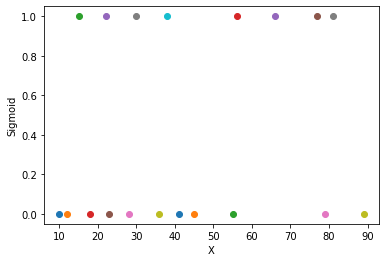

In [383]:
print(" X  |    Y")
print("Age | Can Buy?")

for k,l in zip(age, buy):
    print(k," |   ", l) 
    
    plt.scatter(k, l)
    plt.plot(k, l)
    plt.xlabel('X')
    plt.ylabel('Sigmoid')
plt.show()

 X  |    Y
Age | Can Buy?
10  | 0.9999546021312976
12  | 0.9999938558253978
15  | 0.999999694097773
18  | 0.9999999847700205
22  | 0.9999999997210531
23  | 0.9999999998973812
28  | 0.9999999999993086
30  | 0.9999999999999065
36  | 0.9999999999999998
38  | 1.0
41  | 1.0
45  | 1.0
55  | 1.0
56  | 1.0
66  | 1.0
77  | 1.0
79  | 1.0
81  | 1.0
89  | 1.0


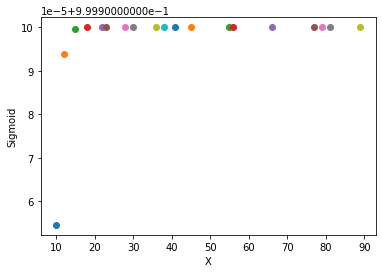

In [388]:
print(" X  |    Y")
print("Age | Can Buy?")

for k,l in zip(age, logistic):
    print(k," |", l) 
    
    plt.scatter(k, l)
    plt.plot(k, l)
    plt.xlabel('X')
    plt.ylabel('Sigmoid')
plt.show()